In [2]:
import pandas as pd

In [3]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
# import plotly_express as px
import tqdm
from tqdm.notebook import tqdm_notebook
import numpy as np
import us

In [10]:
df = pd.read_csv('StateEarthquakeData.csv')

In [11]:
def mean(*numbers):
    amount = len(numbers)
    total = sum(numbers)
    mean_num = total/amount
    return mean_num

In [5]:
# locator = Nominatim(user_agent="myGeocoder", timeout=10)
# rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
# df["geom"] = df["latitude"].map(str) + ',' + df['longitude'].map(str)

# for index, row in df.iterrows():
#     print("finding state number: ", index)
#     location = locator.reverse(df["geom"][index])
#     if location:
#         address = location.raw['address']
#         state = address.get('state', '')
#         df["state"][index] = state
#         print(state)
#         print("-------------------------")
# df.to_csv()

In [120]:
occurrence_dict = {}
magnitude_dict = {}
df = df[df['state'].notna()] # remove nan values from state column
for index, row in df.iterrows():
    if row['state'] in occurrence_dict:
        
#         EXISTS
        occurrence_dict[row['state']] += 1
        mean_num = mean(magnitude_dict[row['state']], row['mag'])
        magnitude_dict[row['state']] = mean_num
    else:
#         DOES NOT EXIST
        magnitude_dict[row['state']] = row['mag']
        occurrence_dict[row['state']] = 1

custom_df = pd.DataFrame(occurrence_dict.items(), columns = ['states','occurrences'])

In [131]:
for row in list(occurrence_dict):
    state = us.states.lookup(row)
    if state:
        abbr = state.abbr
        occurrence_num = occurrence_dict[row]
        magnitude_num = magnitude_dict[row]
        del occurrence_dict[row]
        del magnitude_dict[row]
        occurrence_dict[abbr] = occurrence_num
        magnitude_dict[abbr] = magnitude_num
    else:
        del occurrence_dict[row]
        del magnitude_dict[row]
magnitude_df = pd.DataFrame(magnitude_dict.items(), columns=['state', 'magnitude'])
occurrence_df = pd.DataFrame(occurrence_dict.items(), columns=['state', 'occurrence'])


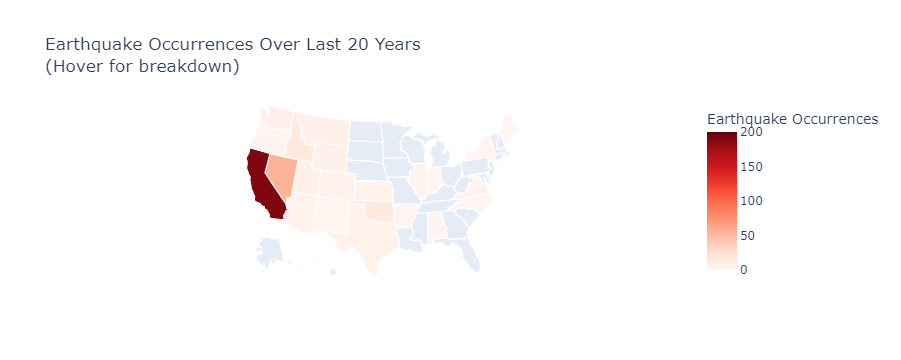

In [135]:
import plotly.graph_objects as go

for col in occurrence_df.columns:
    occurrence_df[col] = occurrence_df[col].astype(str)
for col in magnitude_df.columns:
    magnitude_df[col] = magnitude_df[col].astype(str)

occurrence_df['text'] = 'State: ' + occurrence_df['state'] + '<br>' + \
'Occurrence: ' + occurrence_df['occurrence']


fig = go.Figure(data=go.Choropleth(
    locations=magnitude_df['state'],
    z=occurrence_df['occurrence'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=occurrence_df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Earthquake Occurrences",
    zmax=200,
    zmin=0
))

fig.update_layout(
    title_text='Earthquake Occurrences Over Last 20 Years<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

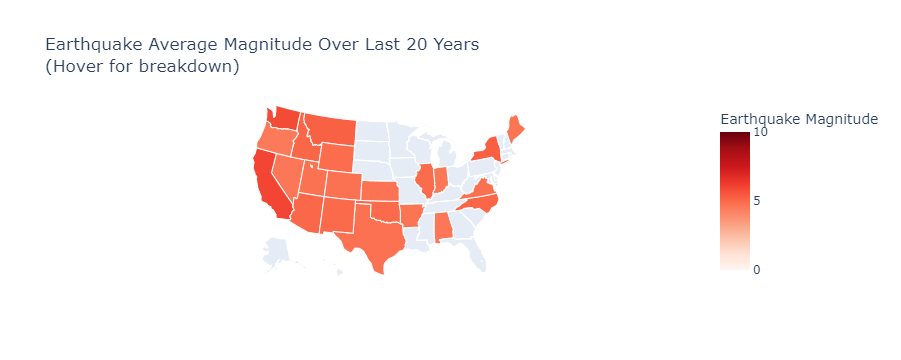

In [139]:
import plotly.graph_objects as go

for col in occurrence_df.columns:
    occurrence_df[col] = occurrence_df[col].astype(str)
for col in magnitude_df.columns:
    magnitude_df[col] = magnitude_df[col].astype(str)

occurrence_df['text'] = 'State: ' + occurrence_df['state'] + '<br>' + \
'Occurrence: ' + occurrence_df['occurrence']


fig = go.Figure(data=go.Choropleth(
    locations=magnitude_df['state'],
    z=magnitude_df['magnitude'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=occurrence_df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Earthquake Magnitude",
    zmax=10,
    zmin=0
))

fig.update_layout(
    title_text='Earthquake Average Magnitude Over Last 20 Years<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()